# U-Net binary cell segmentation
---

<font size = 4>The corresponging **[GitHub repository](https://github.com/esgomezm/MU_Lux_CZ)**.

Author: Estibaliz Gómez de Mariscal, Arrate Muñoz Barrutia

---
<font size = 4>**Please cite the original papers of the U-Net** 

#Give access to your accound in Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Install required libraries
<font size = 4>In case it returns "restart session" at the end fo the installation, please click it and start from the beginning.

In [ ]:
import os
os.chdir("/content/drive/My Drive/Projectos/3D-PROTUCEL/Code/MU_Lux_CZ/CellProtrusionTimeDLPhC/")

!pip3 install -r requirements.txt

     |████████████████████████████████| 38.2MB 1.2MB/s 
     |████████████████████████████████| 516.2MB 31kB/s 
     |████████████████████████████████| 47.4MB 117kB/s 
     |████████████████████████████████| 102kB 12.9MB/s 
     |████████████████████████████████| 225kB 50.1MB/s 
     |████████████████████████████████| 3.0MB 49.0MB/s 
     |████████████████████████████████| 460kB 65.0MB/s 
     |████████████████████████████████| 48.9MB 108kB/s 
     |████████████████████████████████| 706kB 46.1MB/s 
  Created wheel for imreg-dft: filename=imreg_dft-2.0.0-cp37-none-any.whl size=47174 sha256=c79b2bbc4561230d7e5e360f1816602775eb21a2191b50ec36abebfc524e66b7
  Stored in directory: /root/.cache/pip/wheels/af/40/ca/1ef8f71ee679d463d7d73bf918a5807aa2b0e8e35cc59f5489
Successfully built imreg-dft
ERROR: distributed 2021.5.0 has requirement dask==2021.05.0, but you'll have dask 2.12.0 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Mon May 17 08:36:39 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    24W / 300W |      0MiB / 16160MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Convert Matlab matrices into tif files

In [ ]:
from utils.utils import load_mat_files
path2registered='/content/drive/Shareddrives/GR.INV. BIIG-QMIC/3D-PROTUCELL/DEVELOPMENT/REGISTERED_VIDEOS/5000/7-1-14/001_xy001_stackreg.mat'
# video = load_mat_files(path2registered)
# video = np.clip(video, np.min(video), 65535)
video = video.astype(np.uint16)

In [ ]:
import SimpleITK as sitk
import sys
import os
from utils.utils import load_mat_files
path2registered='/content/drive/Shareddrives/GR.INV. BIIG-QMIC/3D-PROTUCELL/DEVELOPMENT/REGISTERED_VIDEOS'
path2tifs = '/content/drive/MyDrive/Projectos/3D-PROTUCEL/LUNG-FIBROSARCOMA-CANCER-10X-HT1080WT'


def convert_videos(path2registered, path2tifs):
    folders = os.listdir(path2registered)
    print(folders)
    for f in folders:
        print(f)
        if not os.path.exists(os.path.join(path2tifs, f)):
            os.makedirs(os.path.join(path2tifs, f))
        files = os.listdir(os.path.join(path2registered, f))
        if not files[0].__contains__('.mat'):
            convert_videos(os.path.join(path2registered, f),os.path.join(path2tifs, f))
        else:
            for video in files:
                if video.__contains__('stackreg'):
                    video_path = os.path.join(path2registered, f, video)
                    matlab_array=load_mat_files(video_path)
                    matlab_array = np.clip(matlab_array, 0, 65535)
                    matlab_array = matlab_array.astype(np.uint16)
                    sitk.WriteImage(sitk.GetImageFromArray(matlab_array), os.path.join(path2tifs, f, video.split('.mat')[0]+'.tif'))
                    del matlab_array
                    print('{} already converted into TIFF and stored.'.format(video_path))
convert_videos(path2registered, path2tifs)





In [ ]:
import os
os.chdir("/content/drive/My Drive/Projectos/3D-PROTUCEL/Code/MU_Lux_CZ/MU_Lux_CZ/")
import SimpleITK as sitk
import sys
import os
import matplotlib.pyplot as plt
from utils.utils import load_mat_files
path2registered='/content/drive/Shareddrives/GR.INV. BIIG-QMIC/3D-PROTUCELL/DEVELOPMENT/REGISTERED_VIDEOS/5000/6-12-14/1_xy003_stackreg.mat'
matlab_array=load_mat_files(path2registered)

plt.figure(figsize=(20,20))
plt.imshow(np.clip(matlab_array, 0, 65535))
plt.colorbar()
plt.show()

plt.figure(figsize=(20,20))
plt.imshow((matlab_array-np.min(matlab_array))/(np.max(matlab_array)-np.min(matlab_array)))
plt.colorbar()
plt.show()

# path2tifs = '/content/drive/MyDrive/Projectos/3D-PROTUCEL/LUNG-FIBROSARCOMA-CANCER-10X-HT1080WT'

# Segment entire videos

In [ ]:
import os
os.chdir("/content/drive/My Drive/Projectos/3D-PROTUCEL/Code")
!ls

In [ ]:
!python MU_Lux_CZ/MU_Lux_CZ/inference_new_videos.py '/content/drive/MyDrive/Projectos/3D-PROTUCEL/Code/MU_Lux_CZ/mobilenet_mobileunet_lstm_tips_large_pure_v01_keep/config_mobilenet_mobileunet_lstm_tips_large_10keeps.json'

In [ ]:
JSON='/content/drive/MyDrive/Projectos/3D-PROTUCEL/Code/MU_Lux_CZ/mobilenet_mobileunet_lstm_tips_large_pure_v01_keep/config_mobilenet_mobileunet_lstm_tips_large_10keeps.json'

NEW_DATA = "/content/drive/MyDrive/Projectos/3D-PROTUCEL/LUNG-FIBROSARCOMA-CANCER-10X-HT1080WT"

folders = ["5000/6-12-14", "5000/7-1-14", "5000/6-15-14",
          "Videos and corresponding protrusion analysis/IL-6/5-31-14",
          "Videos and corresponding protrusion analysis/IL-6/12-5-12",
          "Videos and corresponding protrusion analysis/IL-6/6-1-14",
          "Videos and corresponding protrusion analysis/IL-8/6-12-14",
          "Videos and corresponding protrusion analysis/IL-8/6-15-14", 
           "10000/11-19-13","10000/11-20-13"]
# folders = ["5000/6-15-14"]
import json
import time
import os
for f in range(len(folders)):
    start_time = time.time()
    videos = os.path.join(NEW_DATA, folders[f])
    print(videos)
    with open(JSON, "r") as jsonFile:
        data = json.load(jsonFile)

    data["newinfer_data"] = videos
    data["newinfer_output_folder_name"]=os.path.join('corrected_normalization', folders[f])

    with open(JSON, "w") as jsonFile:
        json.dump(data, jsonFile)
    
    !python MU_Lux_CZ/MU_Lux_CZ/inference_new_videos.py '/content/drive/MyDrive/Projectos/3D-PROTUCEL/Code/MU_Lux_CZ/mobilenet_mobileunet_lstm_tips_large_pure_v01_keep/config_mobilenet_mobileunet_lstm_tips_large_10keeps.json'

    print("--- %s seconds ---" % (time.time() - start_time))

# Process the video in a given path

In [ ]:
import os
os.chdir("/content/drive/My Drive/Projectos/3D-PROTUCEL/Code/MU_Lux_CZ/MU_Lux_CZ")
!ls

08759594.pdf	    examples		     prueba_inference_new_videos.py
additional_scripts  inference_new_videos.py  README.md
analysis	    internals		     requirements.txt
build_excels.py     localize_protrusions.py  RESULTS.md
ctc_evaluation.py   models		     test.py
data_generators     MU-Lux-CZ.pdf	     train.py
EvaluationSoftware  notebooks		     utils


## Load the trained model

In [ ]:
from utils.read_config import Dict2Obj
from models.builder import build_model
import numpy as np
import sys
import os
import SimpleITK as sitk
from internals.process_full_videos import process_video

PATH2CONFIG = '/content/drive/MyDrive/Projectos/3D-PROTUCEL/Code/MU_Lux_CZ/mobilenet_mobileunet_lstm_tips_large_pure_v01_keep/config_mobilenet_mobileunet_lstm_tips_large_10keeps.json'
config = Dict2Obj(PATH2CONFIG)

# Load the model
# ----------------------------------------------
# Choose the model to process the data
# model_name = config.cnn_name + "{epoch:0>5}.hdf5".format(epoch=config.newinfer_epoch_process_test)
model_name = config.newinfer_epoch_process_test
print(model_name)
# Obtaining network architecture and load the weights of the trained model
config.train_pretrained_weights = os.path.join(config.OUTPUTPATH, 'checkpoints/', model_name)
keras_model = build_model(config)

weights_best.hdf5
{'n_filters': 25, 'pools': 4, 'kernel_size': [3, 3], 'dilation_rate': 1, 'mobile_alpha': 0.35, 'time_windows': 5, 'lr': 3.9062e-07, 'dropout': 0.05, 'activation': 'elu', 'last_activation': 'tanh', 'padding': 'same', 'kernel_initializer': 'glorot_uniform', 'lossfunction': 'sparse_cce', 'loss_tips': 'L1L2', 'metrics': 'accuracy', 'category_weights': [1, 10], 'train_decoder_only': 0}
2023424/2019640 [==============================] - 0s 0us/step
Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_image (InputLayer)        [(None, None, None,  0                                            
__________________________________________________________________________________________________
time_distributed (TimeDistribut (None, None, None, N 243218      input_image[0][0]                
_______________________

## Preprocess the video

In [ ]:
# Set up paths
# ----------------------------------------------

import numpy as np
import sys
from internals.tiling_strategy import mirror_border, optimal_input_size
from utils.utils import load_mat_files, get_normal_fce, read_input_videos
import SimpleITK as sitk
from internals.postprocessing import post_processing


NEW_DATA = "/content/drive/MyDrive/Projectos/3D-PROTUCEL/LUNG-FIBROSARCOMA-CANCER-10X-HT1080WT"
input_path = os.path.join(NEW_DATA, "5000/6-12-14", "1_xy002_stackreg.tif")


halo=config.newinfer_padding
step=[2**config.model_pools, 2**config.model_pools]
batch_size=config.datagen_batch_size
normalization=config.normalization
time_window=config.model_time_windows

if input_path.__contains__('.mat'):
    video = load_mat_files(input_path)
    if video.dtype.name == 'uint16':
      video = video.astype(np.float32)
      video = video / 65535
    else:
        video = video.astype(np.float32)
        video = video / 255
    normalization_fce = get_normal_fce(normalization)
    video = normalization_fce(video)
else:
    # video = sitk.ReadImage(input_path)
    # video = sitk.GetArrayFromImage(video)
    video = read_input_videos(input_path, normalization=normalization)
time_length = video.shape[0]
input_shape = video[0].shape
optimal_size = optimal_input_size(input_shape, halo, step)
sys.stdout.write('\rOptimal size for one frame: {0}\n'.format(optimal_size))
sys.stdout.write("\rProcessing video {0}:\n".format(input_path))
sys.stdout.write('\rRaw input video shape: {0}\n'.format(video.shape))
for t in range(time_length):
    # output = normalization_fce(video[t])
    output = mirror_border(video[t], optimal_size[0], optimal_size[1])
    output = np.expand_dims(output, axis=0)
    if t == 0:
        output_video = np.copy(output)
    else:
        output_video = np.concatenate((output_video, output), axis=0)
sys.stdout.write('\rShape of the video with proper input size: {0}\n'.format(output_video.shape))
del video


Optimal size for one frame: [1216, 1216]
Processing video /content/drive/MyDrive/Projectos/3D-PROTUCEL/LUNG-FIBROSARCOMA-CANCER-10X-HT1080WT/5000/6-12-14/1_xy002_stackreg.tif:
Raw input video shape: (500, 983, 985)
Shape of the video with proper input size: (500, 1216, 1216)


## Process video

In [ ]:
from internals.process_full_videos import predict_batch_at_time_lstm 

# sys.stdout.write('\rInference on a video of size: {0}\n'.format(video.shape))
# time_points = output_video.shape[0]
# # Create the a fake time window for the first frame of the video
# time_padding = np.ones((time_window - 1, video.shape[1], output_video.shape[2]))
# time_padding = output_video[0] * time_padding # [4, 985, 983]
# # Concatenate the first frames at the begining of the video to infer the first frame
# output_video = np.concatenate((time_padding, output_video), axis=0)
# del time_padding
# iterations = np.int(np.ceil(time_points / batch_size))
# sys.stdout.write('\rIterations to compute: {0}\n'.format(iterations))



t = 450
model_output = predict_batch_at_time_lstm(output_video, keras_model, batch_size, t, time_window)

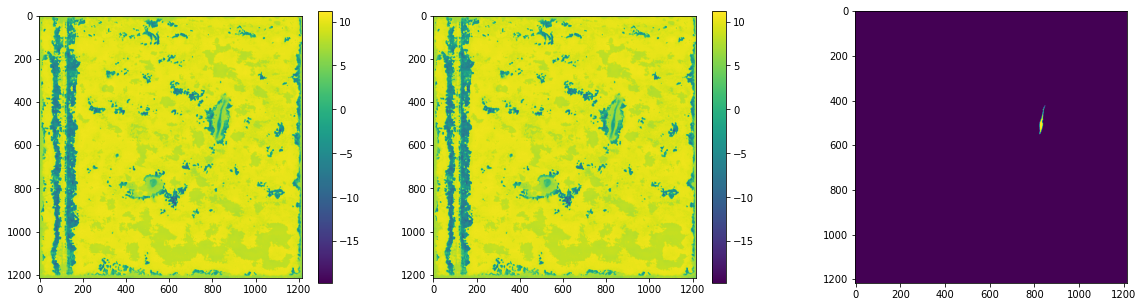

In [ ]:
import matplotlib.pyplot as plt

im = model_output[0][0,0]
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.imshow(im[...,0])
plt.colorbar()

plt.subplot(1,3,2)
plt.imshow(im[...,0])
plt.colorbar()

plt.subplot(1,3,3)
plt.imshow(np.argmax(im, axis=-1))
plt.show()


In [ ]:
sys.stdout.write('\rInference on a video of size: {0}\n'.format(video.shape))
time_points = video.shape[0]
# Create the a fake time window for the first frame of the video
time_padding = np.ones((time_window - 1, video.shape[1], video.shape[2]))
time_padding = video[0] * time_padding # [4, 985, 983]
# Concatenate the first frames at the begining of the video to infer the first frame
video = np.concatenate((time_padding, video), axis=0)
del time_padding
iterations = np.int(np.ceil(time_points / batch_size))
sys.stdout.write('\rIterations to compute: {0}\n'.format(iterations))
t = 0
for i in range(iterations):
    sys.stdout.write('\rProcessing batch {0} of {1}\n'.format(i, iterations))
    model_output = predict_batch_at_time_lstm(video, model, batch_size, t, time_window)
    t += batch_size
    # Check if it is multioutput
    if type(model_output) is list:
        mask = np.copy(model_output[0])
        tips = np.copy(model_output[1])
        # This tensors has shape (batch, time, height, width, 1)
        tips = np.squeeze(tips, axis=-1)
        tips = np.squeeze(tips, axis=1)
        if reduce_tips == True:
            tips = 255 * tips
            tips = tips.astype(np.uint8)
    else:
        mask = model_output
    del model_output

    # Check if it has multiple channels and do softmax to get labels
    if mask.shape[-1] > 1:
        mask = np.argmax(mask, axis=-1)
        mask = mask.astype(np.uint8)
    else:
        mask = np.squeeze(mask, axis=-1)

    # Reduce time dimension which is in the second dim. This tensors have shape (batch, time, height, width, channels).
    mask = np.squeeze(mask, axis=1)

    if i == 0:
        FINAL_MASK = np.copy(mask)
        if type(model.output_shape) is list:
            FINAL_TIPS = np.copy(tips)
        
    else:
        FINAL_MASK = np.concatenate((FINAL_MASK, mask), axis=0)
        if type(model.output_shape) is list:
            FINAL_TIPS = np.concatenate((FINAL_TIPS, tips), axis=0)
            del tips
    del mask

if type(model.output_shape) is list:
    return FINAL_MASK, FINAL_TIPS
else:
    return FINAL_MASK